**1. Install Required Libraries (if needed)**

In [19]:
# No additional libraries are required for this specific code
# Install ucimlrepo if required in future
# !pip install ucimlrepo

**2. Import Libraries and Load Dataset**

In [20]:
# Import necessary libraries
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Ensure y is a 1D array for processing
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


**3. Define Models and Train Them**

In [27]:
# Initialize models
models = {
    "Naive Bayes": GaussianNB(),
    "K-Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Dictionary to store accuracies and training times
results = {}

# Train and test each model
for name, model in models.items():
    start_time = time.time()
    # Train the model
    model.fit(X_train, y_train)
    end_time = time.time()
    # Predict on test data
    y_pred = model.predict(X_test)
    # Calculate accuracy and training time
    accuracy = accuracy_score(y_test, y_pred)
    training_time = end_time - start_time
    results[name] = {"Accuracy": accuracy, "Training Time": training_time}

# Output the results for verification
print("Model Training Results:")
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']:.2f}, Training Time = {metrics['Training Time']:.4f} seconds")



Model Training Results:
Naive Bayes: Accuracy = 0.98, Training Time = 0.0034 seconds
K-Neighbors: Accuracy = 1.00, Training Time = 0.0022 seconds
Decision Tree: Accuracy = 1.00, Training Time = 0.0017 seconds
Logistic Regression: Accuracy = 1.00, Training Time = 0.0229 seconds
Random Forest: Accuracy = 1.00, Training Time = 0.2411 seconds
Neural Network: Accuracy = 1.00, Training Time = 0.5006 seconds


**4. Visualize Results with Side-by-Side Bar Plots**

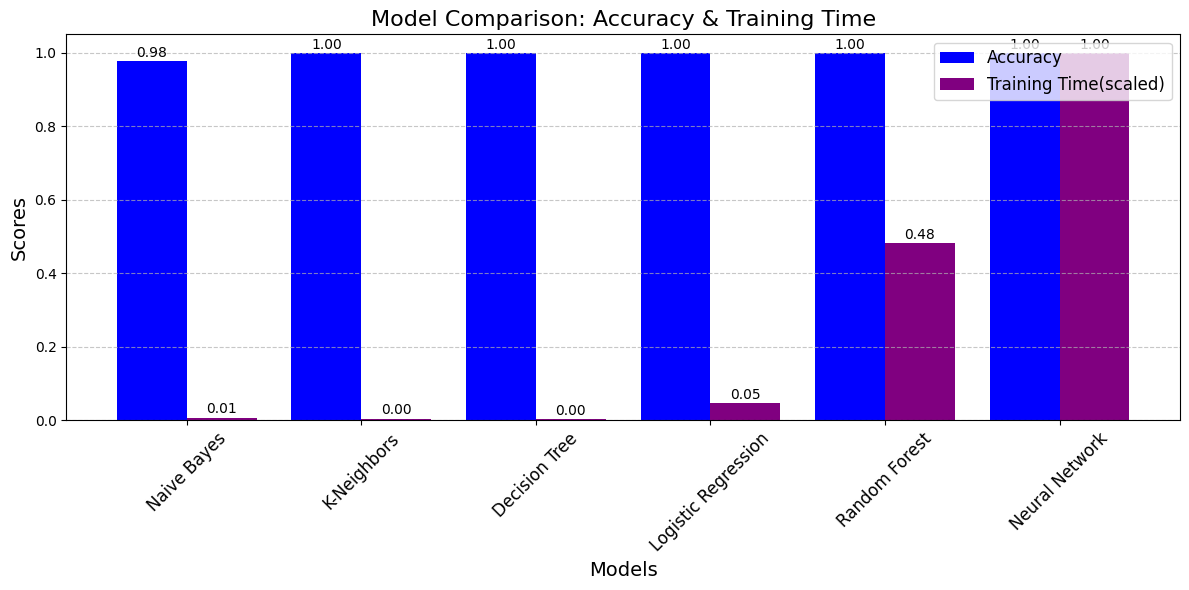

In [30]:
# Extract data for plotting
accuracy_scores = [v["Accuracy"] for v in results.values()]
training_times = [v["Training Time"] for v in results.values()]
model_names = list(results.keys())

# Scale training time for visualization
scaled_training_times = [time / max(training_times) for time in training_times]

# Create side-by-side bar plots
x = np.arange(len(model_names))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Bars for Accuracy
accuracy_bars = ax.bar(x - width / 2, accuracy_scores, width, label='Accuracy', color='blue')

# Bars for Scaled Training Time
training_bars = ax.bar(x + width / 2, scaled_training_times, width, label='Training Time(scaled)', color='purple')

# Annotate bars with values
for bar in accuracy_bars:
    ax.annotate(f'{bar.get_height():.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

for bar in training_bars:
    ax.annotate(f'{bar.get_height():.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

# Customizing the plot
ax.set_title('Model Comparison: Accuracy & Training Time', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=12, rotation=45)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
